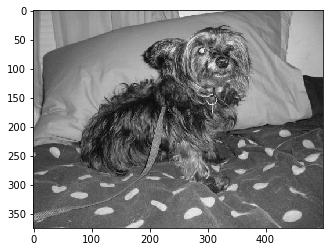

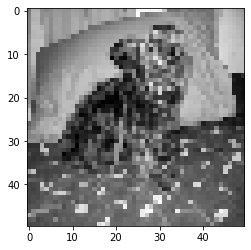

In [6]:
# Project from Thomas Schwarzhuber.
# I don't need a grade for the exam.

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Specify the data directory and the categories/folders you want to use:

DATADIR = "C:/Daten/Datasets/PetImages"
CATEGORIES = ["Dog","Cat"]

# I used the cats and dogs dataset from the following link:
# https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

# Plot an example image (grayscaled) to compare it with the rescaled image:

path_example = os.path.join(DATADIR, CATEGORIES[0])
image_example = os.listdir(path_example)[0]
image_example = cv2.imread(os.path.join(path_example,image_example),cv2.IMREAD_GRAYSCALE)
plt.imshow(image_example,cmap="gray")
plt.show()

# Specify the image size the images should have after resizing:
    
IMG_SIZE = 50

# Visualize the rescaling process on the example image:

new_image = cv2.resize(image_example,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image, cmap = "gray")
plt.show()

In [7]:
# Create the training dataset:

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            # The function 'try' is used to avoid including broken images.
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                # Append the images and their labels to the 'training_data' list:
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

# 'training_data' is a list containing all images and labels as tupels.
# We can print the length of this list to see how many images are used (broken images excluded):

print(len(training_data))

24944


In [8]:
import random

# Shuffle the training data so that the model does not focus on just one category:

random.shuffle(training_data)

# Create 'X' for the images and 'y' for the labels:

X = []
y = []

# Store the images/features in 'X' and the labels in 'y'.

for features,label in training_data:
    X.append(features)
    y.append(label)
    
# Convert 'X' into an array of correct size: 

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Also convert 'y' to an array:

y = np.array(y)

In [9]:
# Saving the python structure using pickle, if we want to continue later from here:

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle

# Specify the name of our model. To avoid overwriting we use a timestamp:

NAME = "Cats-vs-dogs-cnn-64x2-{}".format(int(time.time()))

# Tensorboard is used for visualizing additional info like e.g. validation accuracy.

tensorboard = TensorBoard(log_dir = "logs/{}".format(NAME))

# Load the data that we have saved above (not needed if everything is done in one step):

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

# Normalize the pixel values to a range between 0 and 1:

X = X/255.0

In [11]:
# Initialize the model:

model = Sequential()

# We add a convolutional layer with a size of 64 and grid size 3x3:

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))

# As an activation function we use the 'rectified linear unit':

model.add(Activation("relu"))

# And we add a MaxPooling layer which picks the maximum value out of a 2x2 grid:

model.add(MaxPooling2D(pool_size=(2,2)))

# For better image classification we repeat the last three steps:

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Then we convert our image data, which are still arrays, to a vector form:

model.add(Flatten())

# We add another layer of size 32 with the 'rectified linear unit' activation:

model.add(Dense(32))
model.add(Activation("relu"))

# For the output layer we use the 'sigmoid' function: (sig(x) = 1/(1+e^(-x)) )

model.add(Dense(1))
model.add(Activation('sigmoid'))

# 'Binary_crossentropy' because we have only two classes

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

model.fit(X, y, batch_size = 32, epochs = 8, validation_split = 0.1, shuffle=True, callbacks=[tensorboard])

model.save('64x3-CNN.model')

Epoch 1/10
702/702 [==============================] - 64s 91ms/step - loss: 0.6494 - accuracy: 0.6094 - val_loss: 0.5657 - val_accuracy: 0.7074
Epoch 2/10
702/702 [==============================] - 61s 87ms/step - loss: 0.5382 - accuracy: 0.7308 - val_loss: 0.5074 - val_accuracy: 0.7559
Epoch 3/10
702/702 [==============================] - 61s 87ms/step - loss: 0.4772 - accuracy: 0.7725 - val_loss: 0.4854 - val_accuracy: 0.7559
Epoch 4/10
702/702 [==============================] - 61s 87ms/step - loss: 0.4263 - accuracy: 0.8020 - val_loss: 0.4311 - val_accuracy: 0.7964
Epoch 5/10
702/702 [==============================] - 62s 89ms/step - loss: 0.3884 - accuracy: 0.8249 - val_loss: 0.4300 - val_accuracy: 0.8036
Epoch 6/10
702/702 [==============================] - 62s 88ms/step - loss: 0.3622 - accuracy: 0.8386 - val_loss: 0.4135 - val_accuracy: 0.8088
Epoch 7/10
702/702 [==============================] - 62s 89ms/step - loss: 0.3297 - accuracy: 0.8572 - val_loss: 0.3894 - val_accuracy:

In [3]:
# Load the model, if it was saved before:

model = tf.keras.models.load_model('64x3-CNN.model')

# We can print the model architecture here:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)         

In [4]:
# Testing the model

import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

CATEGORIES = ["Dog","Cat"]

# For testing the model with new images, the function 'prepare' adjustes
# the images make predictions on them.

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    new_array = new_array[np.newaxis,:,:,np.newaxis]
    return new_array

# Specify the folder where the test images are located:

testfolder = 'C:/Daten/Datasets/PetImages/test'

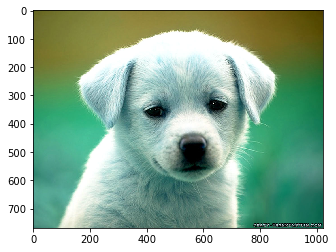

It is a Dog.


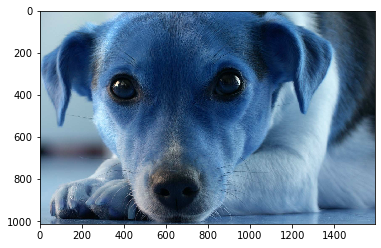

It is a Dog.


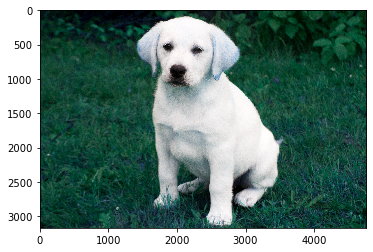

It is a Dog.


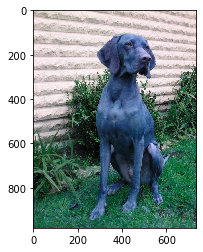

It is a Dog.


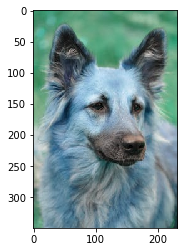

It is a Dog.


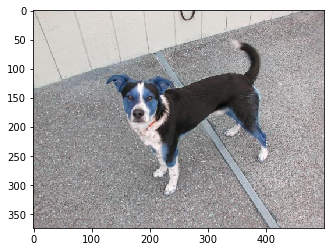

It is a Dog.


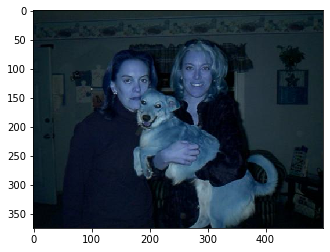

It is a Dog.


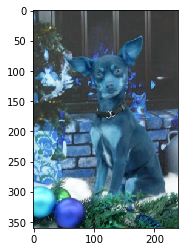

It is a Dog.


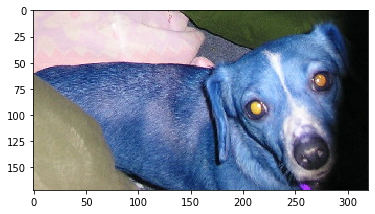

It is a Dog.


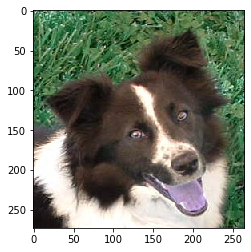

It is a Dog.


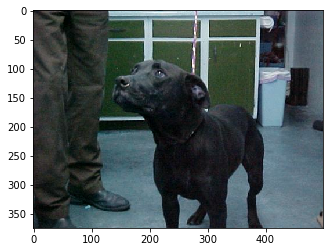

It is a Dog.


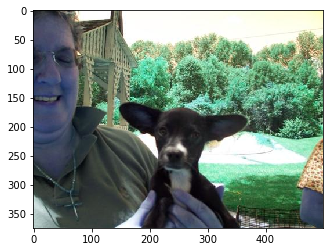

It is a Cat.


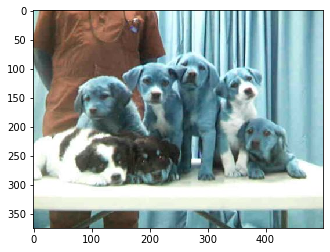

It is a Cat.


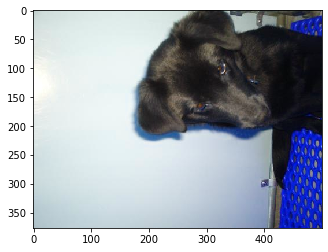

It is a Dog.


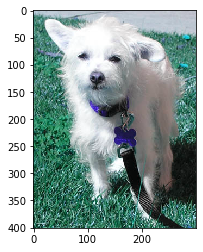

It is a Dog.


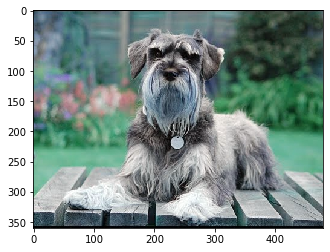

It is a Dog.


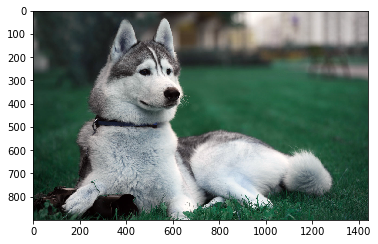

It is a Dog.


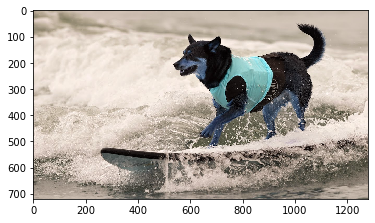

It is a Dog.


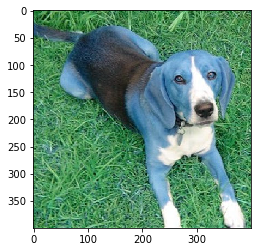

It is a Dog.


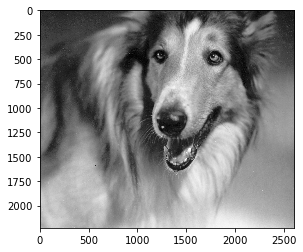

It is a Dog.


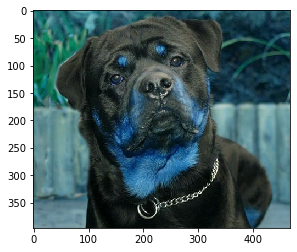

It is a Dog.


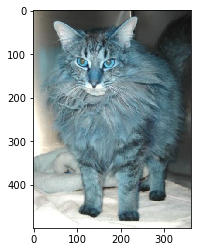

It is a Cat.


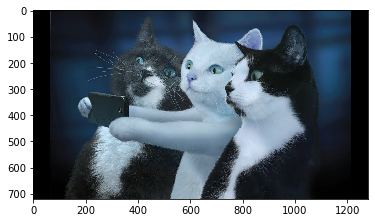

It is a Dog.


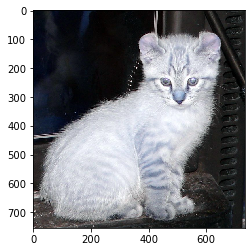

It is a Cat.


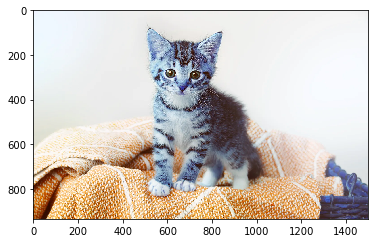

It is a Dog.


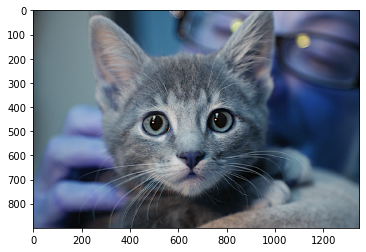

It is a Cat.


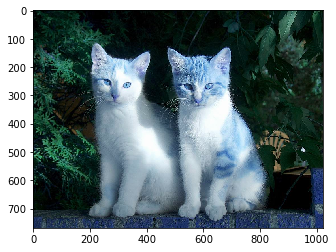

It is a Cat.


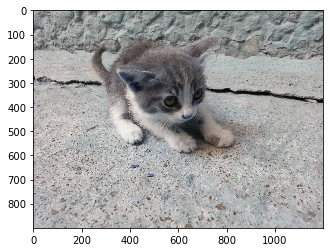

It is a Dog.


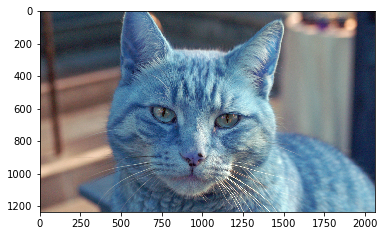

It is a Dog.


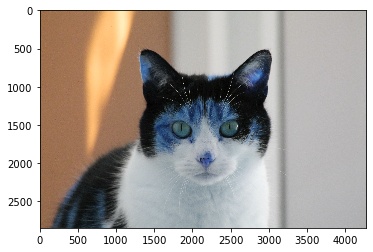

It is a Cat.


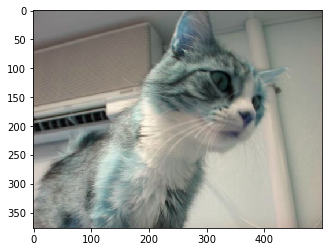

It is a Cat.


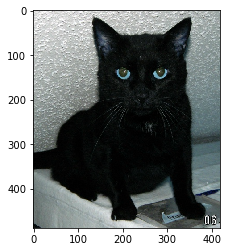

It is a Cat.


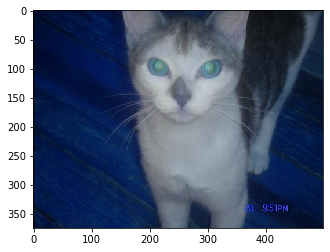

It is a Cat.


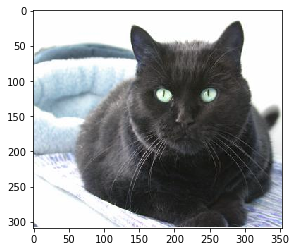

It is a Cat.


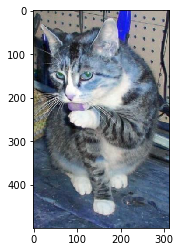

It is a Cat.


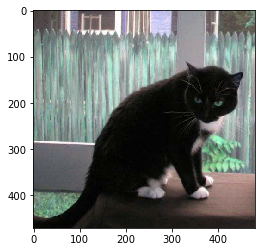

It is a Cat.


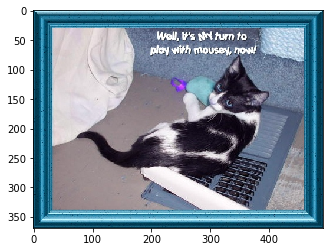

It is a Cat.


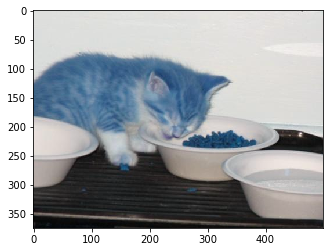

It is a Dog.


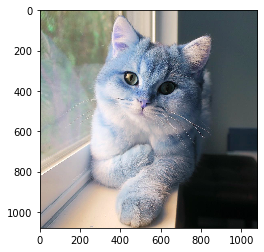

It is a Dog.


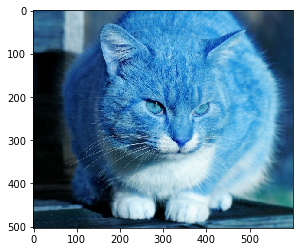

It is a Dog.


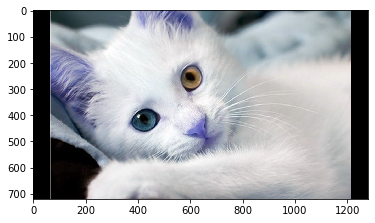

It is a Cat.

The accuracy is 0.7804878048780488


In [5]:
# Then the model predicts the classification:

predictions = []
labels = []

for category in CATEGORIES:
    test_path = os.path.join(testfolder, category)
    for img in os.listdir(test_path):
        img_path = os.path.join(test_path,img)
        plt.imshow(cv2.imread(img_path))
        plt.show()
        prediction = model.predict([prepare(img_path)])
        predictions.append(int(prediction[0][0]))
        labels.append(CATEGORIES.index(category))
        print("It is a",CATEGORIES[int(prediction[0][0])]+".")

# We can also calculate the accuracy on the test images.

count = 0
for i in range(len(predictions)):
    if predictions[i] == labels[i]:
        count += 1

# And finally print the accuracy:
        
accuracy = count/len(predictions)
print("\nThe accuracy is",accuracy)